# CASE STUDY - Cancer Mortality#


In [3756]:
import warnings
warnings.filterwarnings('ignore')

In [3757]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3758]:
cancer = pd.read_csv('C:\\Users\\CHITRANG\\Downloads\\cancer_reg.csv')

In [3759]:
cancer.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3760]:
cancer.shape

(3047, 34)

In [3761]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
avgAnnCount                3047 non-null float64
avgDeathsPerYear           3047 non-null int64
TARGET_deathRate           3047 non-null float64
incidenceRate              3047 non-null float64
medIncome                  3047 non-null int64
popEst2015                 3047 non-null int64
povertyPercent             3047 non-null float64
studyPerCap                3047 non-null float64
binnedInc                  3047 non-null object
MedianAge                  3047 non-null float64
MedianAgeMale              3047 non-null float64
MedianAgeFemale            3047 non-null float64
Geography                  3047 non-null object
AvgHouseholdSize           3047 non-null float64
PercentMarried             3047 non-null float64
PctNoHS18_24               3047 non-null float64
PctHS18_24                 3047 non-null float64
PctSomeCol18_24            762 non-null float64
PctBachDeg18_24     

In [3762]:
cancer.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [3763]:
cancer.isnull().sum()*100/len(cancer)

avgAnnCount                 0.000000
avgDeathsPerYear            0.000000
TARGET_deathRate            0.000000
incidenceRate               0.000000
medIncome                   0.000000
popEst2015                  0.000000
povertyPercent              0.000000
studyPerCap                 0.000000
binnedInc                   0.000000
MedianAge                   0.000000
MedianAgeMale               0.000000
MedianAgeFemale             0.000000
Geography                   0.000000
AvgHouseholdSize            0.000000
PercentMarried              0.000000
PctNoHS18_24                0.000000
PctHS18_24                  0.000000
PctSomeCol18_24            74.991795
PctBachDeg18_24             0.000000
PctHS25_Over                0.000000
PctBachDeg25_Over           0.000000
PctEmployed16_Over          4.988513
PctUnemployed16_Over        0.000000
PctPrivateCoverage          0.000000
PctPrivateCoverageAlone    19.986872
PctEmpPrivCoverage          0.000000
PctPublicCoverage           0.000000
P

In [3764]:
cancer=cancer.drop(cancer.loc[:, cancer.isnull().sum()*100/len(cancer) >= 50],axis=1)

In [3765]:
cancer= cancer.drop(['binnedInc','Geography'] , axis=1)

In [3766]:
cancer.shape

(3047, 31)

In [3767]:
cancer['PctEmployed16_Over'].isnull().sum()

152

In [3768]:
cancer['PctEmployed16_Over'].mean()

54.15264248704645

In [3769]:
cancer['PctPrivateCoverageAlone'].mean()

48.45377358490559

In [3770]:
cancer['PctEmployed16_Over'].fillna(cancer['PctEmployed16_Over'].median(), inplace=True)

In [3771]:
cancer['PctPrivateCoverageAlone'].fillna(cancer['PctPrivateCoverageAlone'].median(), inplace=True)

In [3772]:
cancer.isnull().sum()*100/len(cancer)

avgAnnCount                0.0
avgDeathsPerYear           0.0
TARGET_deathRate           0.0
incidenceRate              0.0
medIncome                  0.0
popEst2015                 0.0
povertyPercent             0.0
studyPerCap                0.0
MedianAge                  0.0
MedianAgeMale              0.0
MedianAgeFemale            0.0
AvgHouseholdSize           0.0
PercentMarried             0.0
PctNoHS18_24               0.0
PctHS18_24                 0.0
PctBachDeg18_24            0.0
PctHS25_Over               0.0
PctBachDeg25_Over          0.0
PctEmployed16_Over         0.0
PctUnemployed16_Over       0.0
PctPrivateCoverage         0.0
PctPrivateCoverageAlone    0.0
PctEmpPrivCoverage         0.0
PctPublicCoverage          0.0
PctPublicCoverageAlone     0.0
PctWhite                   0.0
PctBlack                   0.0
PctAsian                   0.0
PctOtherRace               0.0
PctMarriedHouseholds       0.0
BirthRate                  0.0
dtype: float64

In [3773]:
z = np.abs(stats.zscore(cancer))
print(z)

[[0.55832793 0.56151822 0.49605667 ... 0.03981779 0.24532391 0.24101109]
 [0.30600329 0.23006748 0.62580062 ... 0.4997902  0.89342793 0.65838175]
 [0.35614015 0.26974596 0.14286478 ... 0.21717556 0.4870854  0.96239123]
 ...
 [0.95777583 0.27768165 0.89249653 ... 1.05119208 0.59498396 1.09236803]
 [0.95777583 0.26577811 0.13205279 ... 0.04215578 1.10174249 0.97841465]
 [0.95777583 0.2737138  1.25909075 ... 0.17828885 0.72984833 1.68291827]]


In [3774]:
print(z[10][1])

0.2975208928589396


In [3775]:
cancer = cancer[(z < 4).all(axis=1)]

In [3776]:
cancer.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2.733000e+03,2733.000000,2733.000000,2733.000000,2733.000000,...,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000
mean,503.282055,148.072082,179.000659,448.648058,46789.544091,7.688260e+04,16.697183,113.652598,40.985876,39.716465,...,48.690853,41.347164,36.268094,19.108928,85.120204,8.447389,1.006281,1.649067,51.555140,5.587893
std,782.740357,252.975056,26.241440,49.471647,11011.860763,1.450144e+05,5.993604,286.156134,5.090959,5.116713,...,8.633931,9.188958,7.598674,5.787051,14.350085,13.138411,1.350786,2.260577,5.962409,1.802661
min,7.000000,3.000000,80.800000,234.000000,24707.000000,8.270000e+02,4.000000,0.000000,22.300000,22.400000,...,20.700000,15.000000,13.500000,2.600000,18.718618,0.000000,0.000000,0.000000,26.746115,0.000000
25%,81.000000,30.000000,162.200000,422.700000,39033.000000,1.235200e+04,12.200000,0.000000,37.900000,36.500000,...,43.400000,34.700000,31.000000,14.900000,79.562473,0.616955,0.258771,0.292913,48.068750,4.523580
50%,174.000000,63.000000,178.700000,453.549422,45168.000000,2.725400e+04,15.800000,0.000000,41.000000,39.700000,...,48.700000,41.300000,36.300000,18.800000,90.605104,2.154399,0.543626,0.802026,51.759301,5.380501
75%,494.000000,141.000000,195.100000,480.300000,52273.000000,6.652000e+04,20.200000,72.901513,43.900000,42.600000,...,53.800000,47.700000,41.400000,22.900000,95.535032,9.962582,1.159386,2.017088,55.413405,6.469003
max,6146.000000,2183.000000,280.800000,639.700000,94549.000000,1.349050e+06,41.900000,2240.959131,59.000000,60.200000,...,76.600000,68.600000,62.200000,41.900000,99.845905,66.813355,10.829611,15.792818,71.703057,13.554987


In [3777]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
cancer_train, cancer_test = train_test_split(cancer, train_size = 0.7, test_size = 0.3, random_state = 100)

In [3778]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [3779]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = cancer.columns

cancer_train[num_vars] = scaler.fit_transform(cancer_train[num_vars])

In [3780]:
cancer_train.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
2469,0.318454,0.016972,0.369048,0.581091,0.334309,0.009806,0.250660,0.508171,0.697143,0.636364,...,0.552773,0.505597,0.535934,0.407125,0.973054,0.005364,0.038285,0.025589,0.567151,0.258708
565,0.049690,0.061927,0.618530,0.645821,0.215855,0.046403,0.377309,0.000000,0.368571,0.346041,...,0.500894,0.466418,0.466119,0.483461,0.891447,0.047381,0.066429,0.106453,0.586154,0.381198
457,0.002281,0.004128,0.629917,0.637639,0.517760,0.001828,0.089710,0.000000,0.608571,0.615836,...,0.792487,0.626866,0.225873,0.078880,0.947175,0.001859,0.000000,0.152714,0.647284,0.733007
1157,0.040567,0.044954,0.416149,0.591467,0.329688,0.030021,0.189974,0.000000,0.628571,0.621701,...,0.590340,0.600746,0.451745,0.419847,0.871409,0.004321,0.042434,0.018905,0.603234,0.303538
2285,0.005213,0.006422,0.380952,0.369959,0.114048,0.005564,0.564644,0.428559,0.580000,0.469208,...,0.500894,0.229478,0.638604,0.580153,0.492766,0.587387,0.000000,0.113301,0.354260,0.293529


In [3781]:
cancer_train.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,...,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000
mean,0.080076,0.066255,0.476168,0.566783,0.315174,0.056183,0.335582,0.051333,0.531231,0.504926,...,0.500988,0.492408,0.466397,0.421434,0.816794,0.127060,0.092301,0.105338,0.553087,0.412496
std,0.127788,0.117060,0.138118,0.144553,0.160434,0.108830,0.160336,0.128756,0.143828,0.147562,...,0.155009,0.171513,0.156988,0.149010,0.181995,0.200979,0.124714,0.144057,0.134089,0.133734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011893,0.012385,0.389234,0.490941,0.203054,0.008636,0.213720,0.000000,0.445714,0.413490,...,0.406082,0.367537,0.357290,0.312977,0.749844,0.008883,0.023382,0.018625,0.472825,0.333820
50%,0.026393,0.026606,0.473085,0.581091,0.291715,0.018844,0.311346,0.000000,0.534286,0.507331,...,0.500894,0.494403,0.468172,0.412214,0.885232,0.031403,0.049124,0.050483,0.558799,0.398043
75%,0.077224,0.062844,0.561077,0.658387,0.394770,0.048163,0.430079,0.035658,0.617143,0.589443,...,0.592129,0.610075,0.572895,0.519084,0.948532,0.141497,0.106315,0.130490,0.639682,0.478930
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


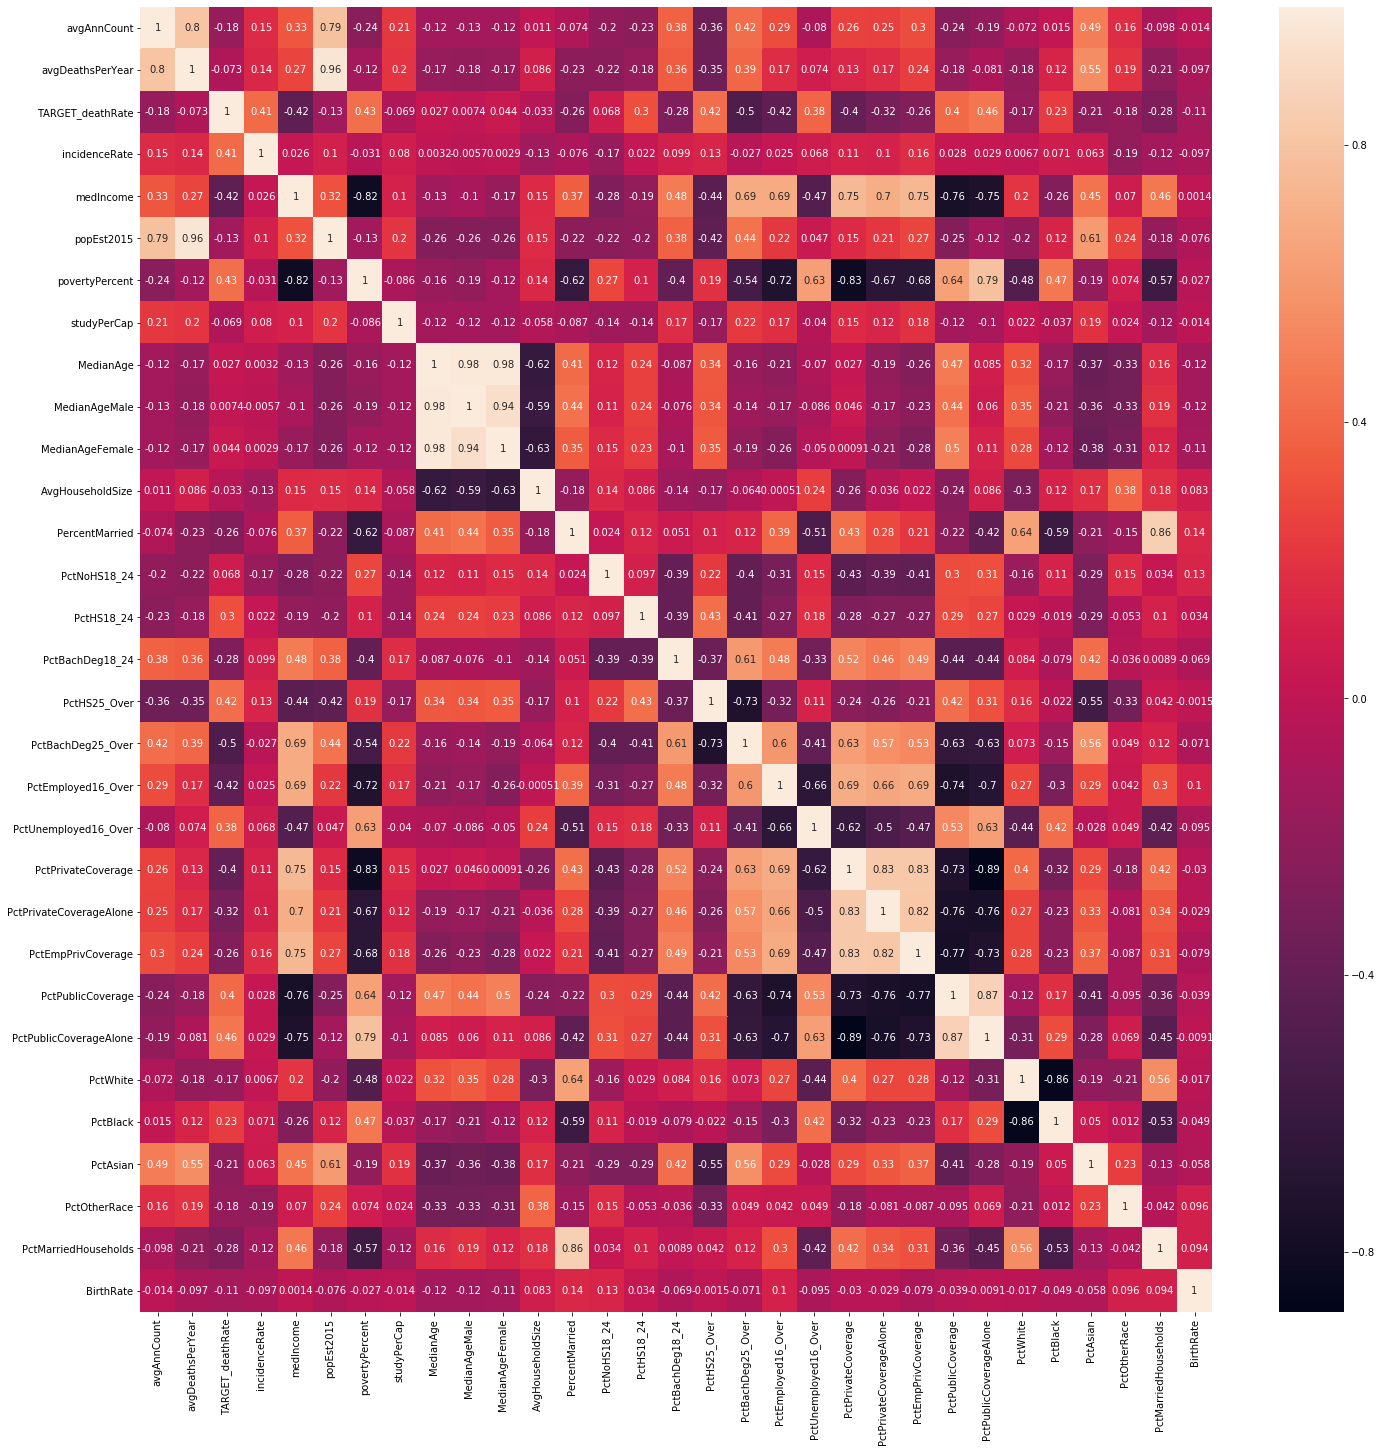

In [3782]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24, 24))
sns.heatmap(cancer_train.corr(), annot = True, )
plt.show()

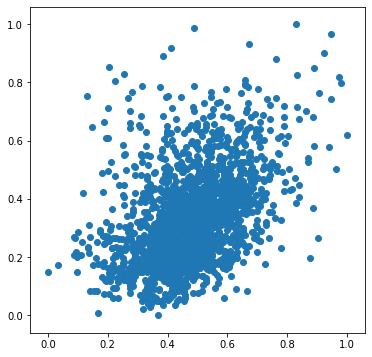

In [3783]:
plt.figure(figsize=[6,6])
plt.scatter(cancer_train.TARGET_deathRate, cancer_train.povertyPercent)
plt.show()

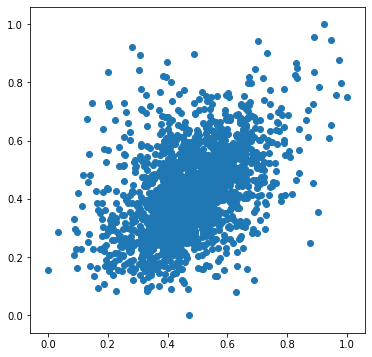

In [3784]:
plt.figure(figsize=[6,6])
plt.scatter(cancer_train.TARGET_deathRate, cancer_train.PctPublicCoverageAlone)
plt.show()

In [3785]:
# Dividing into X and Y sets for building building

y_train = cancer_train.pop('TARGET_deathRate')
X_train = cancer_train

In [3786]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['PctPublicCoverageAlone']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [3787]:
# Check the parameters obtained

lr.params

const                     0.298081
PctPublicCoverageAlone    0.422572
dtype: float64

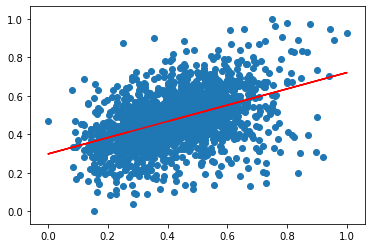

In [3788]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.298 + 0.423*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [3789]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     501.4
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           8.23e-99
Time:                        14:45:00   Log-Likelihood:                 1296.0
No. Observations:                1913   AIC:                            -2588.
Df Residuals:                    1911   BIC:                            -2577.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [3790]:
# Assign all the feature variables to X
X_train_lm = X_train[['PctPublicCoverageAlone', 'povertyPercent']]

In [3791]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                     0.301412
PctPublicCoverageAlone    0.295361
povertyPercent            0.149831
dtype: float64

In [3792]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     268.2
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          2.20e-103
Time:                        14:45:01   Log-Likelihood:                 1309.9
No. Observations:                1913   AIC:                            -2614.
Df Residuals:                    1910   BIC:                            -2597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [3793]:
X_train_lm = X_train[['incidenceRate', 'povertyPercent', 'PctHS25_Over', 'PctUnemployed16_Over', 'PctPublicCoverage', 'PctPublicCoverageAlone']]

In [3794]:
# Build a linear model

X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                    -0.000882
incidenceRate             0.354881
povertyPercent            0.186339
PctHS25_Over              0.241383
PctUnemployed16_Over      0.099766
PctPublicCoverage        -0.102191
PctPublicCoverageAlone    0.195036
dtype: float64

In [3795]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     274.7
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          1.16e-253
Time:                        14:45:02   Log-Likelihood:                 1669.2
No. Observations:                1913   AIC:                            -3324.
Df Residuals:                    1906   BIC:                            -3286.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [3796]:
# Build a linear model

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                      0.553000
avgAnnCount               -0.099679
avgDeathsPerYear           0.322918
incidenceRate              0.324765
medIncome                  0.096204
popEst2015                -0.253000
povertyPercent             0.114405
studyPerCap               -0.001689
MedianAge                  0.388997
MedianAgeMale             -0.316375
MedianAgeFemale           -0.208516
AvgHouseholdSize          -0.160415
PercentMarried             0.159169
PctNoHS18_24              -0.046369
PctHS18_24                 0.117255
PctBachDeg18_24           -0.009574
PctHS25_Over               0.071735
PctBachDeg25_Over         -0.219627
PctEmployed16_Over        -0.122101
PctUnemployed16_Over       0.020462
PctPrivateCoverage        -0.232360
PctPrivateCoverageAlone    0.042382
PctEmpPrivCoverage         0.082748
PctPublicCoverage         -0.092539
PctPublicCoverageAlone     0.069670
PctWhite                  -0.038063
PctBlack                  -0.002881
PctAsian                   0

In [3797]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     69.79
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          1.59e-279
Time:                        14:45:02   Log-Likelihood:                 1788.5
No. Observations:                1913   AIC:                            -3515.
Df Residuals:                    1882   BIC:                            -3343.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [3798]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3799]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,MedianAge,4169.05
9,MedianAgeFemale,1250.52
8,MedianAgeMale,1149.10
11,PercentMarried,263.54
22,PctPublicCoverage,260.76
19,PctPrivateCoverage,250.38
28,PctMarriedHouseholds,237.69
23,PctPublicCoverageAlone,199.18
24,PctWhite,127.68
17,PctEmployed16_Over,81.62


In [3800]:
X = X_train.drop('MedianAge', 1)

In [3801]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [3802]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     72.07
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          5.71e-280
Time:                        14:45:03   Log-Likelihood:                 1787.3
No. Observations:                1913   AIC:                            -3515.
Df Residuals:                    1883   BIC:                            -3348.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [3803]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,PctPublicCoverage,260.54
10,PercentMarried,252.50
18,PctPrivateCoverage,248.55
27,PctMarriedHouseholds,232.16
22,PctPublicCoverageAlone,199.06
8,MedianAgeFemale,188.76
7,MedianAgeMale,139.79
23,PctWhite,127.64
16,PctEmployed16_Over,81.39
20,PctEmpPrivCoverage,71.37


In [3804]:
X = X.drop(['MedianAgeFemale','studyPerCap','PctAsian','PctPrivateCoverageAlone'], 1)
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [3805]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     83.51
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          4.26e-283
Time:                        14:45:03   Log-Likelihood:                 1785.7
No. Observations:                1913   AIC:                            -3519.
Df Residuals:                    1887   BIC:                            -3375.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [3806]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,PercentMarried,248.39
18,PctPublicCoverage,235.53
23,PctMarriedHouseholds,225.79
16,PctPrivateCoverage,214.12
19,PctPublicCoverageAlone,192.04
20,PctWhite,123.55
14,PctEmployed16_Over,81.15
17,PctEmpPrivCoverage,68.18
6,MedianAgeMale,61.29
12,PctHS25_Over,45.48


In [3807]:
X = X.drop(['medIncome','PctBachDeg18_24','PctWhite','PctEmpPrivCoverage','PctPrivateCoverage','PctMarriedHouseholds'], 1)
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [3808]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     106.5
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          9.12e-282
Time:                        14:45:03   Log-Likelihood:                 1768.5
No. Observations:                1913   AIC:                            -3497.
Df Residuals:                    1893   BIC:                            -3386.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [3809]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,PctPublicCoverage,167.25
15,PctPublicCoverageAlone,117.34
5,MedianAgeMale,57.31
7,PercentMarried,54.05
12,PctEmployed16_Over,46.71
10,PctHS25_Over,34.40
1,avgDeathsPerYear,24.13
3,popEst2015,22.91
4,povertyPercent,22.34
2,incidenceRate,18.39


In [3810]:
X = X.drop(['PctBlack', 'PctHS25_Over','PctNoHS18_24','PercentMarried','MedianAgeMale','popEst2015'], 1)
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     152.5
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          3.10e-283
Time:                        14:45:04   Log-Likelihood:                 1757.0
No. Observations:                1913   AIC:                            -3486.
Df Residuals:                    1899   BIC:                            -3408.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [3811]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,PctPublicCoverageAlone,87.44
9,PctPublicCoverage,69.01
7,PctEmployed16_Over,29.51
3,povertyPercent,17.60
2,incidenceRate,16.96
4,AvgHouseholdSize,15.05
8,PctUnemployed16_Over,14.30
5,PctHS18_24,12.92
12,BirthRate,11.03
6,PctBachDeg25_Over,10.73


In [3812]:
X = X.drop(['PctPublicCoverageAlone','PctPublicCoverage','PctEmployed16_Over','BirthRate','AvgHouseholdSize','PctUnemployed16_Over','PctHS18_24'], 1)
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_6.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     288.7
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          2.73e-263
Time:                        14:45:04   Log-Likelihood:                 1691.5
No. Observations:                1913   AIC:                            -3369.
Df Residuals:                    1906   BIC:                            -3330.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3137      0.01

,Features,VIF
2,incidenceRate,8.99
4,PctBachDeg25_Over,5.02
3,povertyPercent,4.87
0,avgAnnCount,4.24
1,avgDeathsPerYear,3.85
5,PctOtherRace,1.63


In [3813]:
y_train_price = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

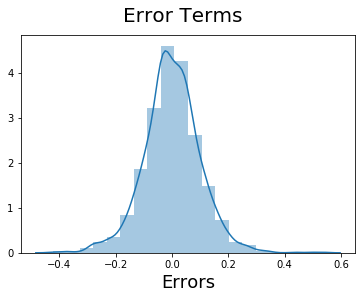

In [3814]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [3815]:
cancer_df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
4,57.0,26,144.4,350.1,49955,10321,12.5,0.0,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
8,88.0,36,190.5,459.4,42579,13088,22.3,0.0,49.3,48.4,...,37.8,29.9,48.1,26.6,91.787477,0.185071,0.208205,0.616903,53.446998,5.587583
12,55.0,26,188.3,398.9,52673,11339,12.6,0.0,45.2,44.9,...,49.7,42.6,36.1,20.5,93.418127,0.844970,0.978387,0.773815,52.947720,4.805592
15,251.0,106,174.2,423.8,43823,43791,19.3,0.0,46.2,45.6,...,39.3,33.9,45.8,24.1,89.177459,0.489115,0.603931,0.865711,55.212399,3.631082
22,94.0,41,189.7,445.2,35615,16704,21.5,0.0,41.5,40.9,...,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
24,152.0,70,236.7,501.8,37625,23372,22.1,0.0,41.9,41.2,...,42.8,41.3,46.3,25.4,98.312500,0.675000,0.091667,0.129167,53.063790,4.220288
25,80.0,40,196.3,396.6,33817,14415,22.2,0.0,44.5,43.7,...,41.9,38.9,43.4,25.4,97.912346,0.497719,0.000000,0.000000,53.272695,5.469020
26,164.0,69,186.2,481.6,43572,23350,15.1,0.0,45.9,44.1,...,49.5,46.4,39.7,19.4,96.818086,1.745193,0.515529,0.063385,47.587238,4.970530
31,280.0,137,217.0,457.0,36739,44997,21.4,0.0,43.2,42.0,...,36.1,34.0,47.8,27.8,93.376378,5.160979,0.103220,0.230597,49.883978,6.526136
34,250.0,103,195.1,494.9,36996,35516,21.1,0.0,45.3,44.6,...,43.3,39.1,43.0,22.1,94.142881,2.299108,0.386923,0.426176,47.480279,4.354354


In [3816]:
num_vars = cancer.columns

cancer_test[num_vars] = scaler.transform(cancer_test[num_vars])

In [3817]:
cancer_test.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,...,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,0.082125,0.067228,0.465904,0.566733,0.313257,0.056942,0.333702,0.049277,0.540066,0.514552,...,0.500131,0.489555,0.470131,0.416903,0.822434,0.124969,0.094363,0.105365,0.548929,0.411639
std,0.126972,0.113705,0.130120,0.144695,0.152370,0.104600,0.152991,0.125246,0.149090,0.155584,...,0.153242,0.171345,0.153835,0.143109,0.164382,0.186248,0.124834,0.145319,0.129179,0.131313
min,-0.000163,0.000000,-0.035197,-0.060491,-0.002311,-0.000001,0.023747,0.000000,0.034286,0.055718,...,0.064401,0.050373,0.045175,0.119593,0.177569,0.000000,0.000000,0.000000,0.083671,0.086920
25%,0.011893,0.011468,0.376812,0.489041,0.205921,0.008147,0.221636,0.000000,0.451429,0.419355,...,0.403846,0.370802,0.361396,0.312977,0.750494,0.009944,0.024979,0.019069,0.476629,0.333388
50%,0.028348,0.028440,0.466874,0.581091,0.288938,0.021237,0.310026,0.000000,0.534286,0.505865,...,0.500894,0.481343,0.469199,0.407125,0.889038,0.035522,0.052479,0.052733,0.550126,0.393657
75%,0.083130,0.066972,0.548784,0.661382,0.388334,0.050247,0.424802,0.025720,0.625714,0.601173,...,0.592129,0.613806,0.572895,0.508906,0.941379,0.161120,0.109815,0.126491,0.630565,0.474114
max,0.884653,0.828440,0.880952,1.125073,0.964811,0.759051,0.936675,0.963622,1.048571,1.108504,...,0.926655,0.944030,0.924025,0.966921,0.997157,0.975004,0.927618,1.008878,0.987187,0.976267


In [3818]:
X_train_lm = X_train_lm.drop(['const'], axis=1)

In [3819]:
y_test = cancer_test.pop('TARGET_deathRate')
X_test = cancer_test

In [3820]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [3821]:
# Making predictions
y_pred = lr_7.predict(X_test_new)

Text(0, 0.5, 'y_pred')

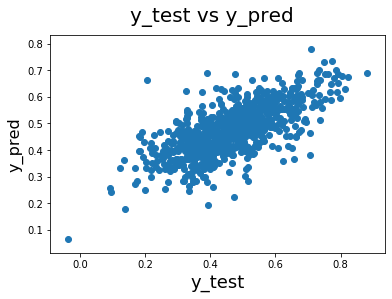

In [3822]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      